In [ ]:
# Importing the required libraries for our problem


from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

In [ ]:
# Creating a function to plot our train and validation scores

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [ ]:
# Importing the train and test datasets

(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
# Checking the number of train and test points in the datasets
print("Number of training examples :",X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1],X_train.shape[2]))
print("Number of test examples :",X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1],X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


In [ ]:
# From the above example we can see that the input image shape is 3d
# For each image we have a (28 * 28) vector
# We will convert the 28*28 2d vector into a single 1*784 1d vector

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [ ]:
# After converting the vector from 3d to 2d vector, checking out the shapes of the data

print("Number of training examples :",X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of test examples :",X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of test examples : 10000 and each image is of shape (784)


In [ ]:
# Taking a look at an example data point

print(X_train[0])

# We can see that we have all the pixel values, which we would like to normalize

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [ ]:
# Normalizing the data

X_train = X_train/255
X_test = X_test/255

In [ ]:
# Checking an example of the data 

print(X_train[0])

# We can now see that the data has been normalized.

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**  MODEL BUILDING**

First we will build a model using only the Softmax Classifier

In [ ]:
# Importing the libraries required to build the model using the sequential process

from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
# Prediciding model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128
nb_epoch = 20

In [ ]:
# Start building a model

model = Sequential()
model.add(Dense(output_dim, input_dim = input_dim, activation = 'softmax'))

In [ ]:
# Compiling the model

model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics =['accuracy'])

In [ ]:
# Fitting the model to the data

history = model.fit(X_train, Y_train, batch_size= batch_size,epochs= nb_epoch, verbose = 1, validation_data = (X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 59us/step - loss: 1.2643 - acc: 0.7087 - val_loss: 0.8021 - val_acc: 0.8369
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.7102 - acc: 0.8430 - val_loss: 0.6022 - val_acc: 0.8653
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.5834 - acc: 0.8604 - val_loss: 0.5222 - val_acc: 0.8752
Epoch 4/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.5227 - acc: 0.8692 - val_loss: 0.4769 - val_acc: 0.8806
Epoch 5/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.4857 - acc: 0.8763 - val_loss: 0.4476 - val_acc: 0.8855
Epoch 6/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.4602 - acc: 0.8807 - val_loss: 0.4265 - val_acc: 0.8898
Epoch 7/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.4413 - acc: 0.8841 - val_loss: 0.4106 - val_acc

In [ ]:
# Printing our test score and accuracy

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test Score', score[0])
print('Test Accuracy', score[1])

Test Score 0.3348974683403969
Test Accuracy 0.9083


In [ ]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>

**MLP + SIGMOID ACTIVATION + SGD-OPTIMIZER**

In [ ]:
# Building out multi layer perceptron with 2 hidden layers, one output layer and one input layer

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512,activation='sigmoid',input_shape = (input_dim,)))
model_sigmoid.add(Dense(128,activation='sigmoid'))
model_sigmoid.add(Dense(output_dim,activation='softmax'))

# Checking the summary of our sigmoid model

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Now we will compile the model
model_sigmoid.compile(optimizer = 'sgd',loss = 'categorical_crossentropy', metrics=['accuracy'])

# Training the model with our mnist dataset
history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs= nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 42us/step - loss: 2.2597 - acc: 0.2451 - val_loss: 2.2103 - val_acc: 0.3525
Epoch 2/20
60000/60000 [==============================] - 2s 38us/step - loss: 2.1630 - acc: 0.4890 - val_loss: 2.1030 - val_acc: 0.4317
Epoch 3/20
60000/60000 [==============================] - 2s 38us/step - loss: 2.0357 - acc: 0.5986 - val_loss: 1.9474 - val_acc: 0.6363
Epoch 4/20
60000/60000 [==============================] - 2s 38us/step - loss: 1.8546 - acc: 0.6587 - val_loss: 1.7345 - val_acc: 0.6735
Epoch 5/20
60000/60000 [==============================] - 2s 37us/step - loss: 1.6246 - acc: 0.6965 - val_loss: 1.4882 - val_acc: 0.7356
Epoch 6/20
60000/60000 [==============================] - 2s 37us/step - loss: 1.3850 - acc: 0.7323 - val_loss: 1.2577 - val_acc: 0.7588
Epoch 7/20
60000/60000 [==============================] - 2s 38us/step - loss: 1.1792 - acc: 0.7600 - val_loss: 1.0766 - val_acc

In [ ]:
# Getting the score and accuracy for our test dataset

score1 = model_sigmoid.evaluate(X_test, Y_test, verbose=0)
print('Test Score:', score1[0])
print('Test Accuracy:', score1[1])

Test Score: 0.45337451143264773
Test Accuracy: 0.8821


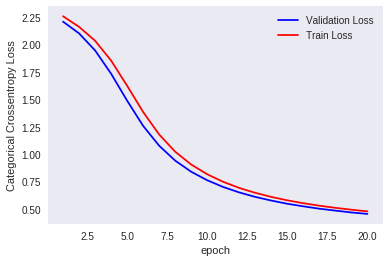

In [ ]:
%matplotlib inline

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


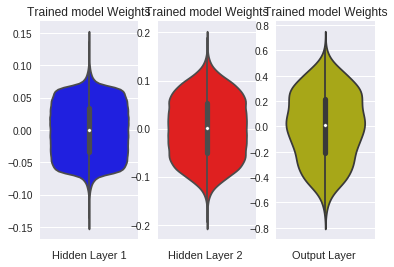

In [ ]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**MLP + BATCH NORMALIZATION + ADAM OPTIMIZER**

In [ ]:
# Importing thelibraryrequired to batch normalize the data
from keras.layers.normalization import BatchNormalization



Using TensorFlow backend.


In [ ]:
# Now we will start creating the model 

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape = (input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid',  kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim,activation = 'softmax'))

model_batch.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [ ]:
# Compiling our final model

model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training our model using the MNIST data

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.3056 - acc: 0.9101 - val_loss: 0.2093 - val_acc: 0.9386
Epoch 2/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1751 - acc: 0.9492 - val_loss: 0.1660 - val_acc: 0.9508
Epoch 3/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1367 - acc: 0.9593 - val_loss: 0.1432 - val_acc: 0.9581
Epoch 4/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.1128 - acc: 0.9658 - val_loss: 0.1322 - val_acc: 0.9590
Epoch 5/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0959 - acc: 0.9711 - val_loss: 0.1299 - val_acc: 0.9579
Epoch 6/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0838 - acc: 0.9744 - val_loss: 0.1205 - val_acc: 0.9623
Epoch 7/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0704 - acc: 0.9781 - val_loss: 0.1170 - val_acc

In [ ]:
# Getting the final Test Scores

score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.09360143299022165
Test accuracy: 0.9744


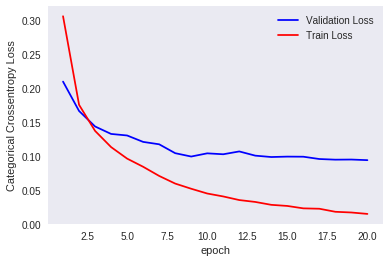

In [ ]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**MLP + BATCH NORMALIZATION + DROPOUT + ADAM **

In [ ]:
# Importing the dropout library

from keras.layers import Dropout

In [ ]:
# Building the model

model_drop = Sequential()

model_drop.add(Dense(512, activation = 'sigmoid', input_shape = (input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(512, activation = 'sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total para

In [ ]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.6142 - acc: 0.8156 - val_loss: 0.2875 - val_acc: 0.9191
Epoch 2/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.3888 - acc: 0.8824 - val_loss: 0.2460 - val_acc: 0.9300
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.3406 - acc: 0.8961 - val_loss: 0.2186 - val_acc: 0.9362
Epoch 4/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.3149 - acc: 0.9040 - val_loss: 0.2061 - val_acc: 0.9394
Epoch 5/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.2917 - acc: 0.9109 - val_loss: 0.1935 - val_acc: 0.9453
Epoch 6/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.2810 - acc: 0.9128 - val_loss: 0.1813 - val_acc: 0.9487
Epoch 7/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.2634 - acc: 0.9203 - val_loss: 0.1736 - val_acc

Test score: 0.09784063237267546
Test accuracy: 0.9712


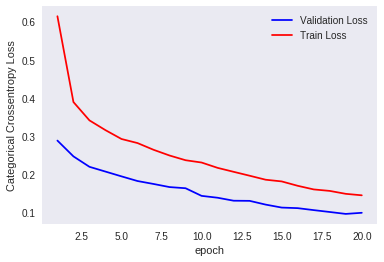

In [ ]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
# ASSIGNMENT
# 3 different architectures
# hidden layers 2(364,52), 3, 5 
# change the hidden layers from the hidden layers which we already have
# For Each case try dropout and batchnormalization, use ReLU activation function, Adam Optimizer
# plot epoch on x axis, train and val losses on y axis
# OUTPUT: plot and accuracy